# Image Thresholding
Learn to convert images to binary images using global thresholding, Adaptive thresholding, Otsu's binarization etc.


## Goal

Learn **simple thresholding**, **adaptive thresholding**, and **Otsu's thresholding**.  
You will learn the functions `cv.threshold` and `cv.adaptiveThreshold`.

---

## Simple Thresholding

Here, the matter is straight-forward. For every pixel, the same threshold value is applied.  
If the pixel value is smaller than or equal to the threshold, it is set to `0`, otherwise it is set to a **maximum value**.  

The function `cv.threshold` is used to apply the thresholding.

- The **first argument** is the source image, which should be a grayscale image.
- The **second argument** is the threshold value which is used to classify the pixel values.
- The **third argument** is the maximum value which is assigned to pixel values exceeding the threshold.
- OpenCV provides **different types of thresholding** which is given by the **fourth parameter** of the function.

Basic thresholding as described above is done by using the type `cv.THRESH_BINARY`.

All simple thresholding types are:

- `cv.THRESH_BINARY`
- `cv.THRESH_BINARY_INV`
- `cv.THRESH_TRUNC`
- `cv.THRESH_TOZERO`
- `cv.THRESH_TOZERO_INV`

| Threshold Type      | Rule         | Bright Background | Dark Object  | Result              |
| ------------------- | ------------ | ----------------- | ------------ | ------------------- |
| `THRESH_BINARY`     | >127 → white | White background  | Black object | Object disappears   |
| `THRESH_BINARY_INV` | >127 → black | Black background  | White object | Object stands out   |


See the documentation of the types for the differences.

The method returns **two outputs**:

1. The threshold that was used.
2. The thresholded image.

---




### This code compares the different simple thresholding types:


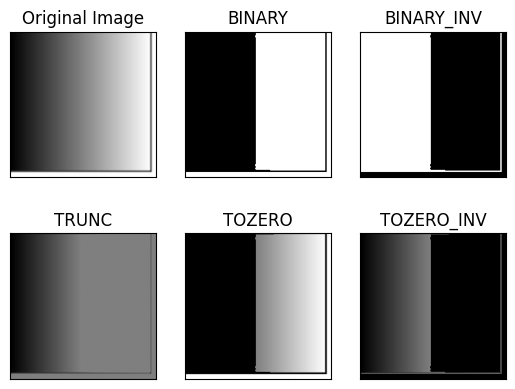

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/gradient.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [7]:
print("Threshold used:", ret)
print("Thresholded image:\n", thresh1)


Threshold used: 127.0
Thresholded image:
 [[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


## Adaptive Thresholding

In the previous section, we used one **global value** as a threshold.  
But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas.  

In that case, **adaptive thresholding** can help.  
Here, the algorithm determines the threshold for a pixel based on a **small region around it**.  
So we get different thresholds for different regions of the same image, which gives better results for images with **varying illumination**.

In addition to the parameters described above, the method `cv.adaptiveThreshold` takes three input parameters:

### `adaptiveMethod`

This decides how the threshold value is calculated:

- `cv.ADAPTIVE_THRESH_MEAN_C`:  
  The threshold value is the **mean of the neighbourhood area** minus the constant `C`.

- `cv.ADAPTIVE_THRESH_GAUSSIAN_C`:  
  The threshold value is a **Gaussian-weighted sum of the neighbourhood values** minus the constant `C`.

### `blockSize`

Determines the **size of the neighbourhood area**.

### `C`

A constant that is **subtracted** from the mean or weighted sum of the neighbourhood pixels.

---


### The code below compares **global thresholding** and **adaptive thresholding** for an image with varying illumination:

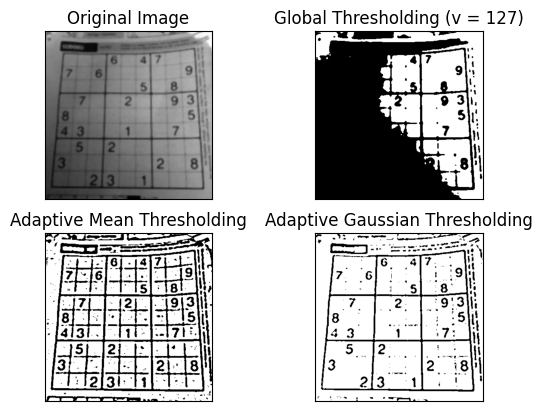

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5) # 5x5 kernel to reduce noise

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Otsu's Binarization

In global thresholding, we used an **arbitrarily chosen value** as a threshold.  
In contrast, **Otsu's method** avoids having to choose a value and determines it **automatically**.

Consider an image with only **two distinct image values** (a **bimodal** image), where the histogram consists of two peaks.  
A good threshold would be in the **middle of those two values**.  
Similarly, **Otsu's method** determines an **optimal global threshold** value from the image histogram.

To do this, the `cv.threshold()` function is used, where `cv.THRESH_OTSU` is passed as an **extra flag**.  
The threshold value can be chosen arbitrarily.  
The algorithm then **finds the optimal threshold value**, which is returned as the **first output**.

---

Check out the example below:

- The **input image** is a **noisy image**.
- In the **first case**, global thresholding with a value of 127 is applied.
- In the **second case**, Otsu's thresholding is applied **directly**.
- In the **third case**, the image is first filtered with a **5x5 Gaussian kernel** to remove the noise, then **Otsu thresholding** is applied.

See how **noise filtering improves the result**.


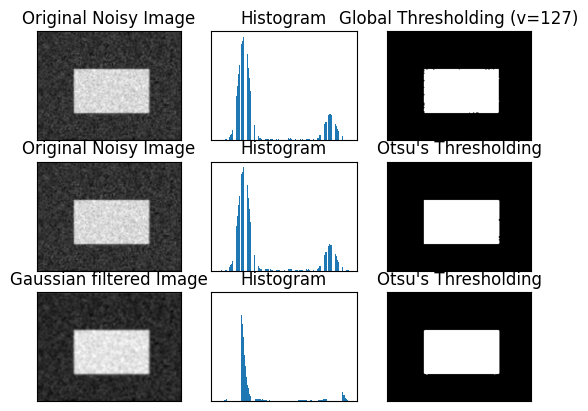

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('images/noisy2.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

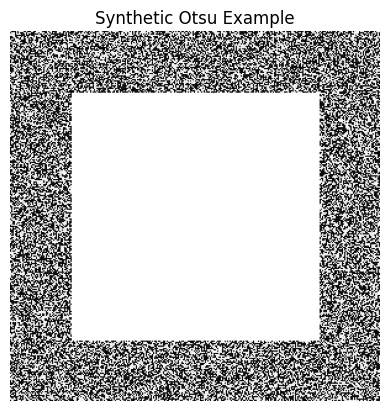

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Create a simple synthetic image
img = np.zeros((300, 300), dtype=np.uint8)
cv.rectangle(img, (50, 50), (250, 250), 255, -1)  # white square on black background

# Add a bit of Gaussian noise (optional)
noise = np.random.normal(0, 20, img.shape).astype(np.uint8)
noisy_img = cv.add(img, noise)

plt.imshow(noisy_img, cmap='gray')
plt.title("Synthetic Otsu Example")
plt.axis('off')
plt.show()
